# Simple usage of KMeans algorithm

I will use one fruit for image segmentation. This procedure will be realized using KMeans clustering algorithm.

In [1]:
import matplotlib.pyplot as plt

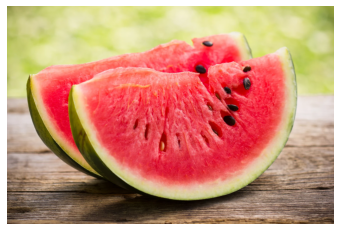

In [2]:
image = plt.imread('data/melancia.jpg')
plt.imshow(image)
plt.axis('off');

The data that we will use in this project is a image of a watermelon. This image was selected because of clearly colors separations and facility of clustering algorithm. This image have tree strong colors: red, green and brown. We use the Kmeans for select the best value of clusters and find this value using the elbow curve.

In [3]:
image.shape

(1125, 1688, 3)

In [4]:
image_flat = image.reshape(image.shape[0] * image.shape[1], 3)

In [5]:
image_flat

array([[133, 139,  62],
       [133, 139,  62],
       [134, 140,  63],
       ...,
       [113,  86,  57],
       [115,  88,  59],
       [118,  91,  61]], dtype=uint8)

Creating the instance and set the initial value of clusters in 4.

In [6]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=4, random_state=0)

In [7]:
clusters.fit(image_flat)

KMeans(n_clusters=4, random_state=0)

In [8]:
image_flat2 = image_flat.copy()

In [9]:
import numpy as np

for i in np.unique(clusters.labels_):
    image_flat2[clusters.labels_==i,:] = clusters.cluster_centers_[i]

In [10]:
image2 = image_flat2.reshape(image.shape)

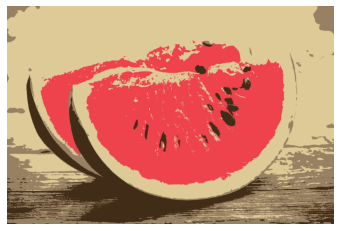

In [11]:
plt.imshow(image2)
plt.axis('off');

Four clustering isn't one good value for segmentation of this image. Thus, we will create the procedure to select the best value of clusters. Furthermore, we will create one function that automatize the procedure that realized above.

## Function for automatize this process

In [12]:
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0] * img.shape[1], 3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

In [13]:
k_vals = list(range(2, 11, 2))
image_list = []
inertia_list = []

for k in k_vals:
    image2, inertia = image_cluster(image, k)
    image_list.append(image2)
    inertia_list.append(inertia)

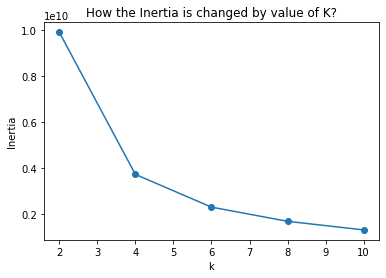

In [14]:
plt.plot(k_vals, inertia_list)
plt.scatter(k_vals, inertia_list)
plt.title('How the Inertia is changed by value of K?')
plt.xlabel('k')
plt.ylabel('Inertia');

As showed in the graph above, 8 or more clusters allow that the image have a good characterization. For better vizualization of this affirmative, we will create the 5 figures for each value of k: 2, 4, 6, 8 and 10.

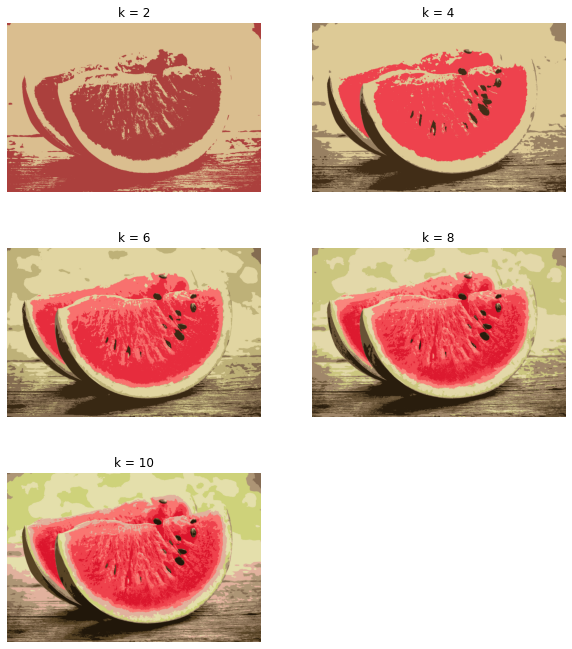

In [15]:
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5, 2, i+1)
    plt.imshow(image_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');

## Conclusions


The algorithm of KMeans is the good form to create a segmentation of images. Furthermore, the elbow curve allow better vizualization of the best value of k for this work.

# Next Steps

The next step will be a create the image segmentation with other unsupervised algorithms as DEBSCAN for exemple. Furthermore, we can use the others algorithms of clustering for segmentation images that have a harder separation of colors.